# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | lucea
Processing Record 8 of Set 1 | boguchany
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | fort saskatchewan
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | yuzhno-kurilsk
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | wamba
Processing Record 17 of Set 1 | dem'yanovo
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | nagqu
Processing Record 22 of Set 1 | 'ohonua
City not found. Skipping...


Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | holualoa
Processing Record 41 of Set 4 | nar'yan-mar
Processing Record 42 of Set 4 | tonota
Processing Record 43 of Set 4 | yulinshi
Processing Record 44 of Set 4 | minas de marcona
Processing Record 45 of Set 4 | chui
Processing Record 46 of Set 4 | mar''ina horka
Processing Record 47 of Set 4 | constantia
Processing Record 48 of Set 4 | al qusayr
Processing Record 49 of Set 4 | santo antonio
Processing Record 0 of Set 5 | tyukhtet
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | shenkursk
Processing Record 3 of Set 5 | savanna-la-mar
Processing Record 4 of Set 5 | marang
Processing Record 5 of Set 5 | geiro
Processing Record 6 of Set 5 | kalamata
Processing Record 7 of Set 5 | gadani
Processing Record 8 of Set 5 | zavodskoy
Processing Record 9 of Set 5 | yabelo
Processing Record 10 of Set 5 | qaqortoq
Processing Record 11 of Set 5 | ust'-barguzin
Processing Record 12 of Set 5 | remire-montj

Processing Record 33 of Set 8 | tatarsk
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | little cayman
City not found. Skipping...
Processing Record 36 of Set 8 | yaren
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | kailua-kona
Processing Record 39 of Set 8 | beira
Processing Record 40 of Set 8 | pangody
Processing Record 41 of Set 8 | caraballeda
Processing Record 42 of Set 8 | tosontsengel
Processing Record 43 of Set 8 | weno
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | lethem
Processing Record 46 of Set 8 | khost
Processing Record 47 of Set 8 | shahrak
Processing Record 48 of Set 8 | pariaman
Processing Record 49 of Set 8 | scalea
Processing Record 0 of Set 9 | barreirinha
Processing Record 1 of Set 9 | san antonio del estrecho
City not found. Skipping...
Processing Record 2 of Set 9 | lembar
City not found. Skipping...
Processing Record 3 of Set 9 | kununurra
Processing Record 4 of Set 9 | motueka
Proces

Processing Record 20 of Set 12 | bandar lampung
Processing Record 21 of Set 12 | tozkhurmato
Processing Record 22 of Set 12 | ciudad victoria
Processing Record 23 of Set 12 | dankov
Processing Record 24 of Set 12 | arkhangel'sk
Processing Record 25 of Set 12 | pitiquito
Processing Record 26 of Set 12 | jiangyou
Processing Record 27 of Set 12 | tromso
Processing Record 28 of Set 12 | vyshkovo
Processing Record 29 of Set 12 | sidi khaled
Processing Record 30 of Set 12 | indramayu
Processing Record 31 of Set 12 | bougouni
Processing Record 32 of Set 12 | itoman
Processing Record 33 of Set 12 | uzice
Processing Record 34 of Set 12 | sigayevo
Processing Record 35 of Set 12 | sorsk
Processing Record 36 of Set 12 | luganville
Processing Record 37 of Set 12 | fort mcmurray
Processing Record 38 of Set 12 | dzhalagash
Processing Record 39 of Set 12 | carutapera
Processing Record 40 of Set 12 | naze
Processing Record 41 of Set 12 | sola
Processing Record 42 of Set 12 | cockburn town
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,26.94,65,40,6.17,NU,1699415750
1,sitka,57.0531,-135.3300,7.94,87,100,5.66,US,1699415750
2,avarua,-21.2078,-159.7750,24.03,60,20,7.72,CK,1699415750
3,hawaiian paradise park,19.5933,-154.9731,26.73,82,0,2.57,US,1699415750
4,jamestown,42.0970,-79.2353,5.77,80,100,5.66,US,1699415750


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,26.94,65,40,6.17,NU,1699415750
1,sitka,57.0531,-135.3300,7.94,87,100,5.66,US,1699415750
2,avarua,-21.2078,-159.7750,24.03,60,20,7.72,CK,1699415750
3,hawaiian paradise park,19.5933,-154.9731,26.73,82,0,2.57,US,1699415750
4,jamestown,42.0970,-79.2353,5.77,80,100,5.66,US,1699415750


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

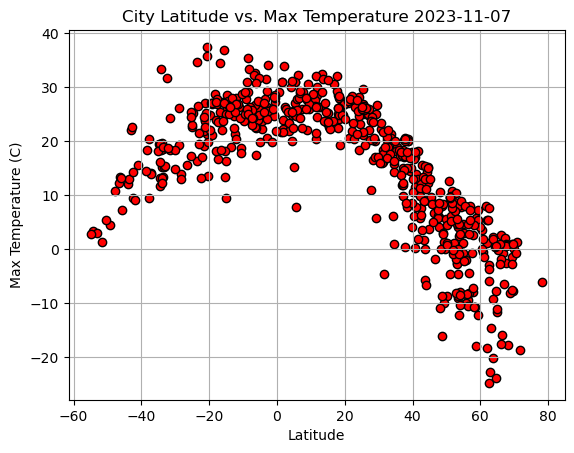

In [8]:
from datetime import date
today=date.today()
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='red',edgecolors='black', )
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

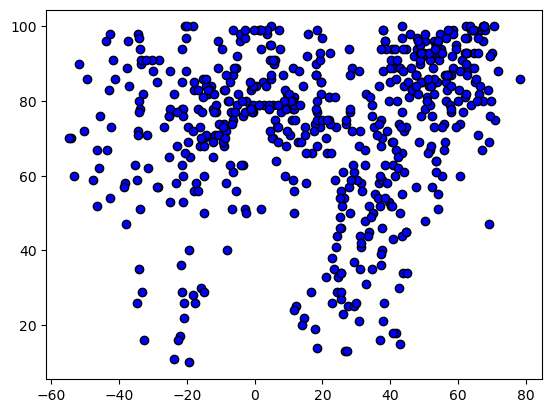

In [9]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue',edgecolors='black', )

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

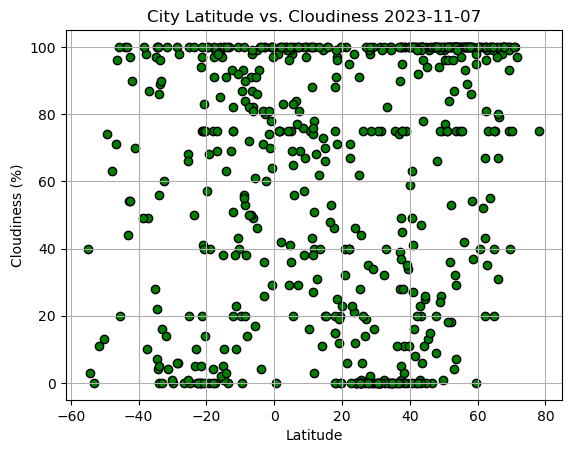

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='green',edgecolors='black', )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

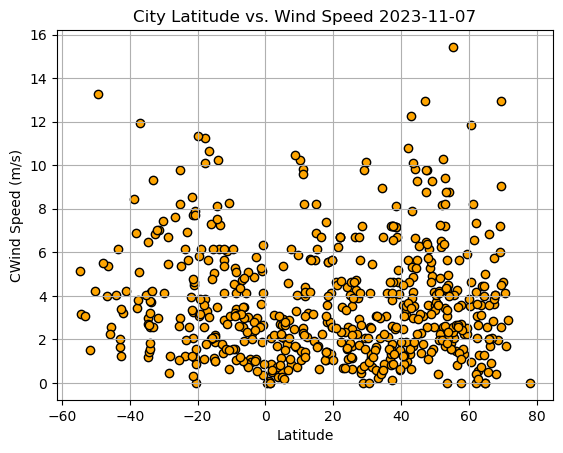

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='orange',edgecolors='black', )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("CWind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def regress_plot(x,regress_values):
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,7.94,87,100,5.66,US,1699415750
3,hawaiian paradise park,19.5933,-154.9731,26.73,82,0,2.57,US,1699415750
4,jamestown,42.0970,-79.2353,5.77,80,100,5.66,US,1699415750
5,tazovsky,67.4667,78.7000,-2.49,96,100,5.72,RU,1699415750
6,lucea,18.4510,-78.1736,27.92,77,97,5.57,JM,1699415751


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,26.94,65,40,6.17,NU,1699415750
2,avarua,-21.2078,-159.7750,24.03,60,20,7.72,CK,1699415750
13,invercargill,-46.4000,168.3500,13.34,67,96,5.36,NZ,1699415752
14,west island,-12.1568,96.8225,27.99,78,75,5.66,CC,1699415752
17,waitangi,-43.9535,-176.5597,12.12,96,100,4.02,NZ,1699415753


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8666752069266714


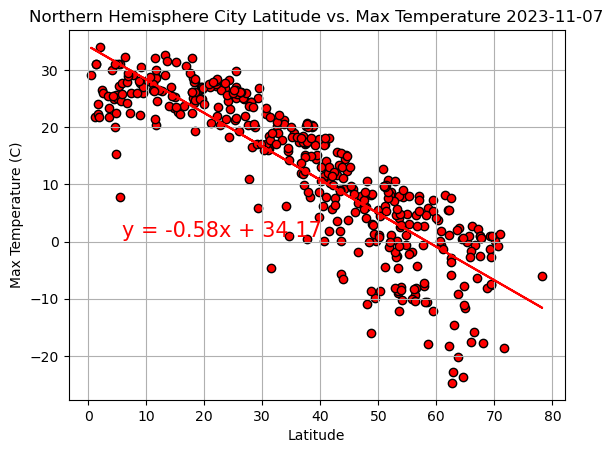

In [40]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='red',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()


The r-value is 0.6967327425084452


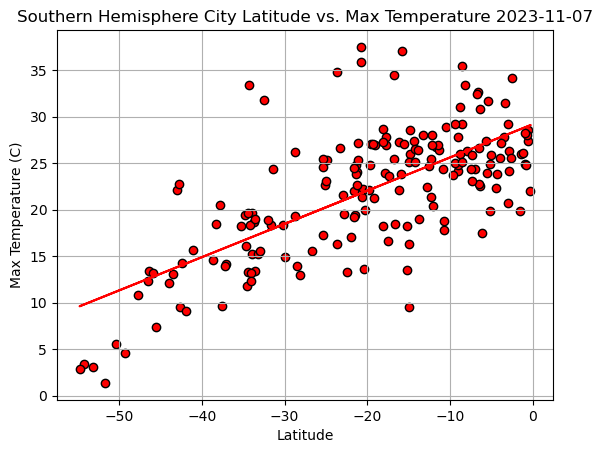

In [41]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='red',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2440231941132658


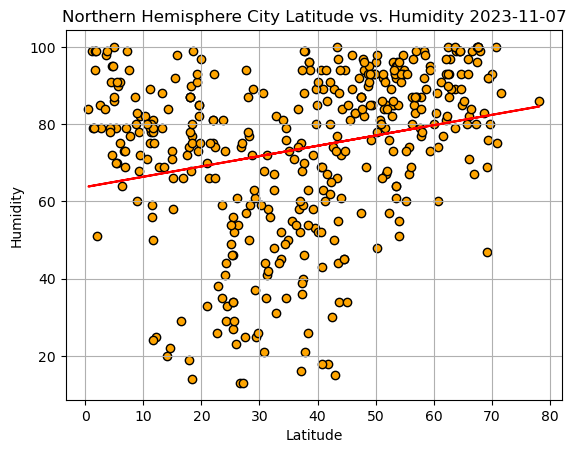

In [43]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='orange',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is 0.10730553706116144


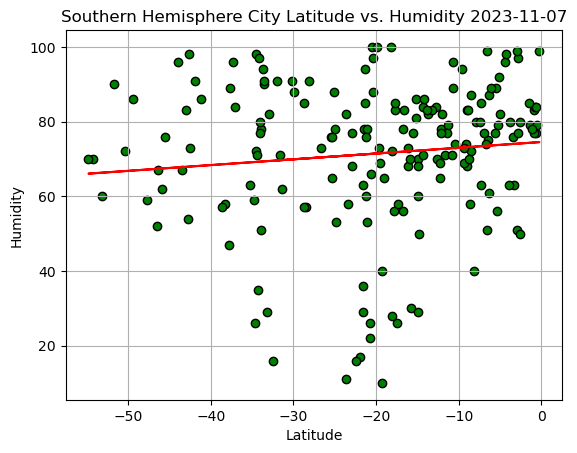

In [44]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='green',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.23491465858946828


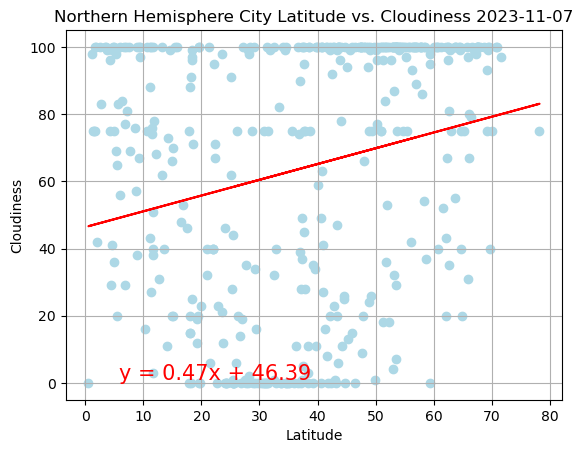

In [45]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='lightblue',edgecolors='lightblue')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is 0.16597919693180443


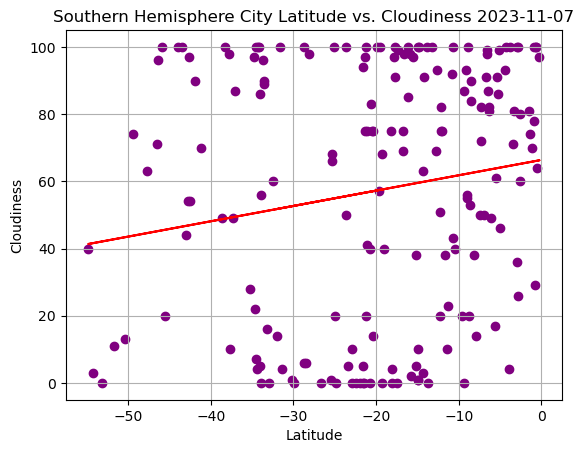

In [46]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='purple',edgecolors='purple')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13056852587172427


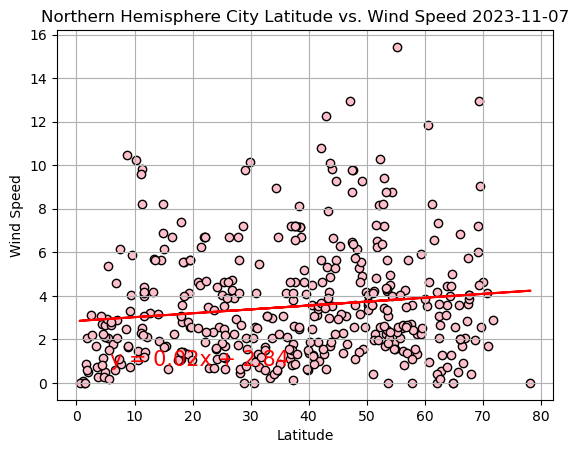

In [47]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='pink',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is -0.17042671576967927


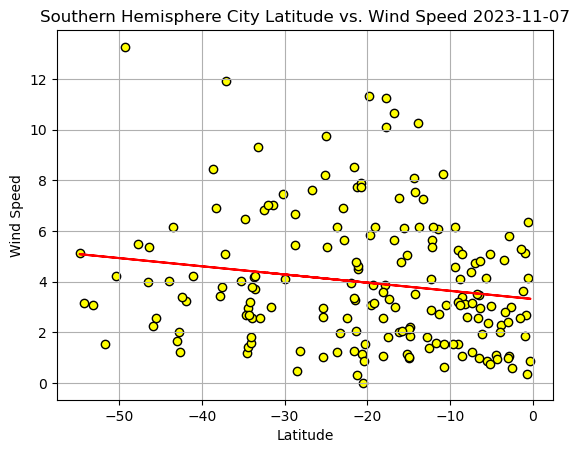

In [48]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis, marker='o', facecolors='yellow',edgecolors='black')
regress_plot(x_axis,regress_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed {today}")
plt.grid()

# Show plot
print(f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE